In [195]:
using AutomotiveDrivingModels
using AutoViz
using Interact

In [196]:
seed = 1
input_filepath = "../../data/trajdatas/$(seed).txt"
veh_filepath = "../../data/trajdatas/seeds_veh_idxs.csv"
infile = open(input_filepath, "r")
trajdata = read(infile, Trajdata);
veh_idxs = readtable(veh_filepath)
veh_idxs = veh_idxs[veh_idxs[:seed] .== seed, :][:vehicle_index]
roadway = gen_stadium_roadway(5, length=400., radius=100.);

Interact.Options{:SelectionSlider,Int64}(Signal{Int64}(100, nactions=1),"frame",100,"100",Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…),Dict(11=>"11",134=>"134",158=>"158",160=>"160",29=>"29",131=>"131",173=>"173",74=>"74",176=>"176",57=>"57"…)),Any[],Any[],true,"horizontal")

Interact.Options{:ToggleButtons,Int64}(Signal{Int64}(9, nactions=1),"veh_idx",9,"9",Interact.OptionDict(DataStructures.OrderedDict("9"=>9,"15"=>15,"16"=>16,"19"=>19,"20"=>20,"32"=>32,"34"=>34,"35"=>35,"40"=>40,"41"=>41…),Dict(68=>"68",148=>"148",124=>"124",197=>"197",160=>"160",193=>"193",131=>"131",59=>"59",173=>"173",111=>"111"…)),Any[],Any[],true,"horizontal")

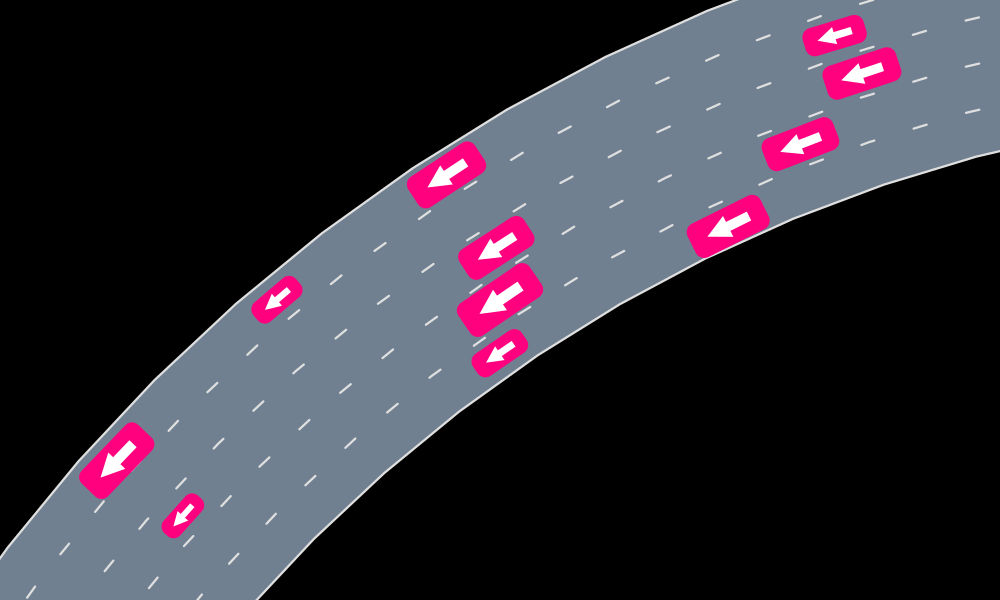

In [197]:
@manipulate for frame in 1:nframes(trajdata),
                veh_idx in veh_idxs
    AutoViz.render(get!(scene, trajdata, frame), roadway, cam = CarFollowCamera(veh_idx, 15.))
end